In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Data Loading and Processing

In [2]:
# Load the dataset
df = pd.read_csv(r"D:\Download\advertising.csv")
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [3]:
df.shape

(200, 4)

In [4]:
# Info about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
df.head(10)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,15.6


In [6]:
df.tail(10)

,TV,Radio,Newspaper,Sales
190,39.5,41.1,5.8,10.8
191,75.5,10.8,6.0,11.9
192,17.2,4.1,31.6,5.9
193,166.8,42.0,3.6,19.6
194,149.7,35.6,6.0,17.3
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


In [7]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [8]:
df.dtypes

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

# Handling missing values

In [9]:
# Checking number of null values in a column
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [10]:
df.count()

TV           200
Radio        200
Newspaper    200
Sales        200
dtype: int64

In [11]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [12]:
corr_matrix = df.corr()
corr_matrix

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


In [13]:
df['Sales'].value_counts()

Sales
11.9    5
16.7    5
20.7    4
11.0    3
11.3    3
       ..
13.4    1
24.2    1
8.1     1
5.5     1
25.5    1
Name: count, Length: 121, dtype: int64

# Splitting the data

In [14]:
# Split the data into input features (X) and target variable (Y)
X = df[['TV','Radio','Newspaper']]
Y = df['Sales']

In [15]:
# Splitting the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [16]:
print(X.shape, X_train.shape, X_test.shape)

(200, 3) (160, 3) (40, 3)


# Data Visualization 

In [17]:
sns.set(style='whitegrid')

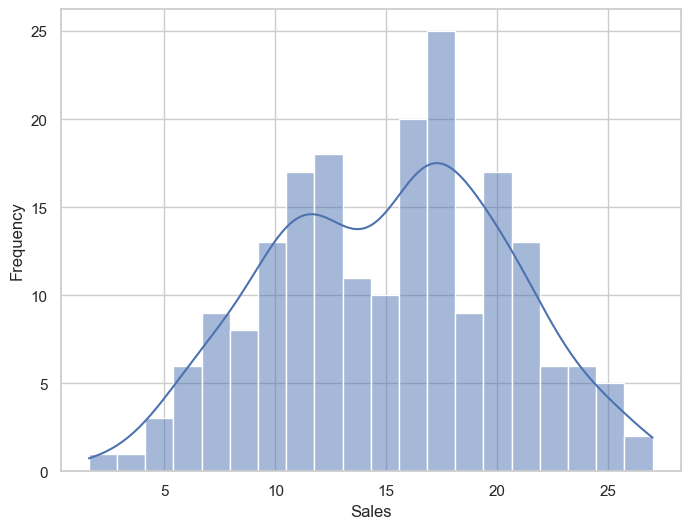

In [18]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Sales'], bins=20, kde=True)
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

<Figure size 600x600 with 0 Axes>

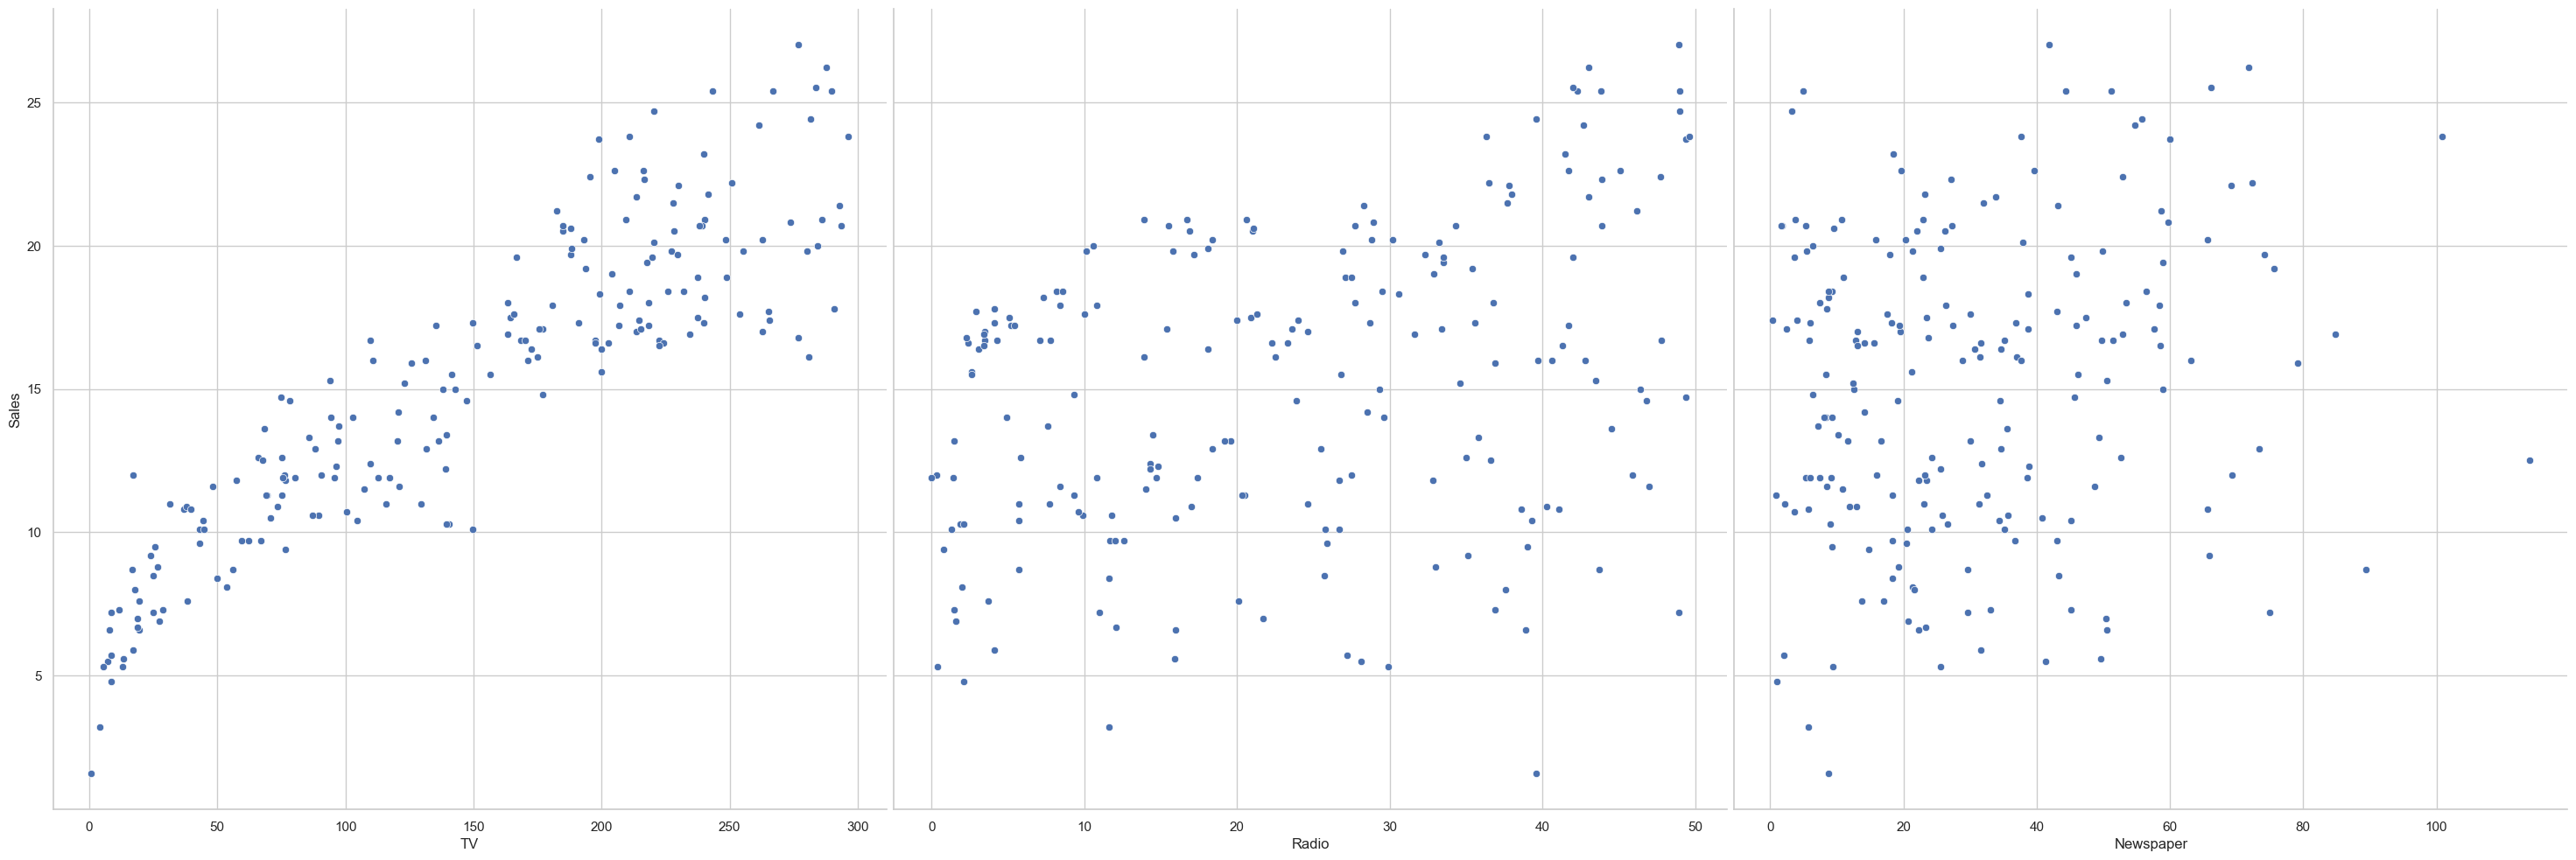

In [19]:
plt.figure(figsize=(6, 6))
sns.pairplot(df,x_vars=['TV','Radio','Newspaper'],y_vars='Sales',height=10,aspect=1)
plt.show()

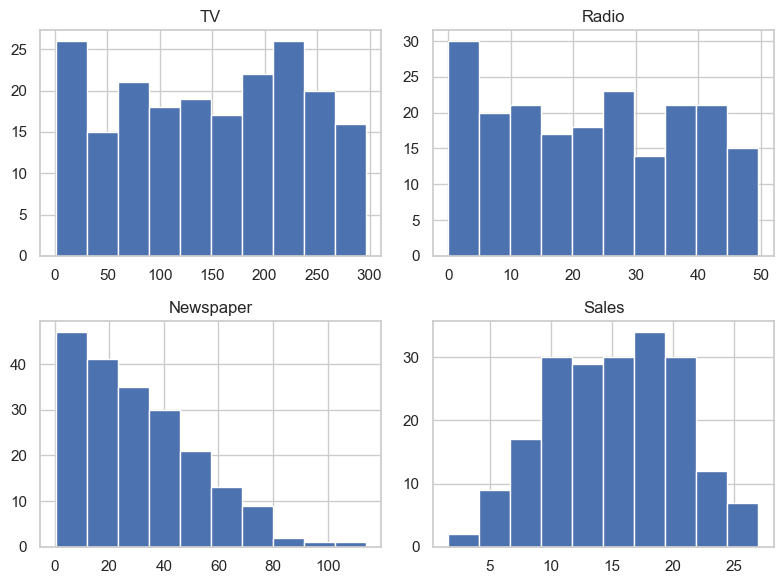

In [20]:
df.hist(bins=10, figsize=(8,6))
plt.tight_layout()
plt.show()

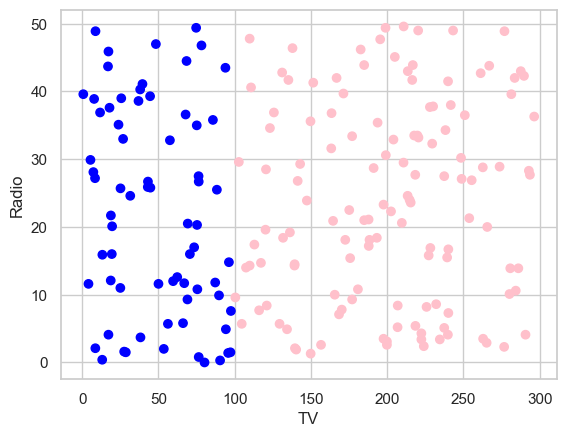

In [21]:
plt.scatter(df['TV'], df['Radio'], c = ['pink' if length>=100 else 'blue' for length in df['TV']])
plt.xlabel("TV")
plt.ylabel("Radio")
plt.show()

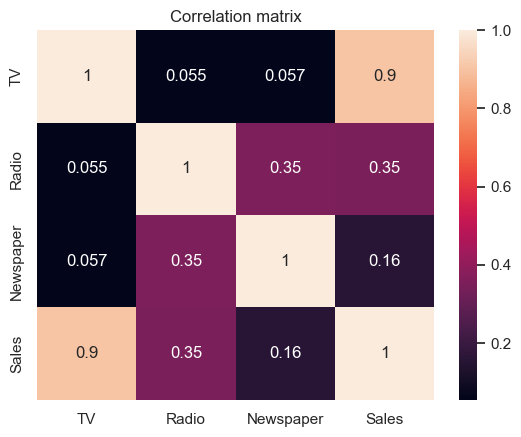

In [22]:
sns.heatmap(corr_matrix, annot = True)
plt.title("Correlation matrix")
plt.show()

<Axes: >

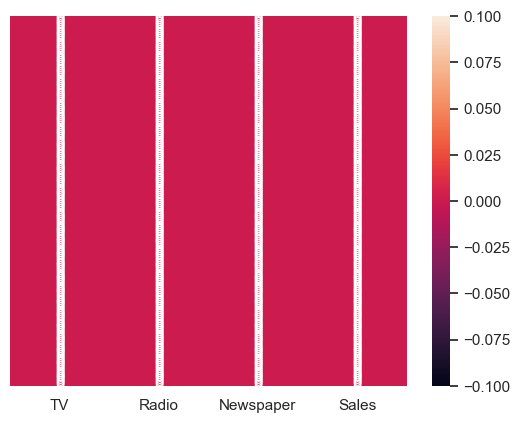

In [23]:
# To check outliers
sns.heatmap(df.isnull(), yticklabels=False, annot = True)

<Axes: xlabel='TV', ylabel='Sales'>

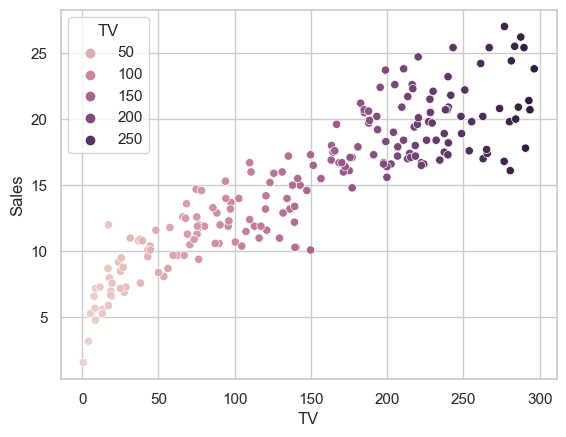

In [24]:
sns.scatterplot(x='TV', y='Sales', hue = 'TV', data=df)

<Axes: xlabel='Newspaper', ylabel='Sales'>

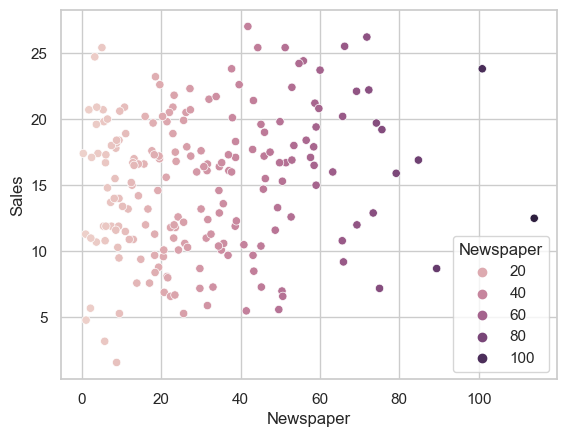

In [25]:
sns.scatterplot(x='Newspaper', y='Sales',hue = 'Newspaper', data=df)

# Training Model

In [26]:
# Linear Regression

In [27]:
model = LinearRegression()

In [28]:
model.fit(X_train, Y_train)

LinearRegression()

In [29]:
y_predict = model.predict(X_test)

In [30]:
#Evaluation

In [31]:
# Mean Squared Error
mse = mean_squared_error(Y_test, y_predict)
mse

2.9077569102710896

In [32]:
# Root Mean Squared Error
rmse = mean_squared_error(Y_test, y_predict, squared = False)
rmse

1.7052146229349223

In [33]:
r2 = r2_score(Y_test, y_predict)
r2

0.9059011844150826

In [34]:
# XGBRegressor

In [35]:
from xgboost import XGBRegressor

In [36]:
regressor = XGBRegressor()

In [37]:
regressor.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [38]:
# Prediction of training data
tdata_predict = regressor.predict(X_train)

In [39]:
# R-Squared value
r2_train = r2_score(Y_train,tdata_predict)
r2_train

0.9999998147868797

In [40]:
# Prediction of testing data
rdata_predict = regressor.predict(X_test)

In [41]:
# R-Squared value
r2_test = r2_score(Y_test,rdata_predict)
r2_test

0.9531005703238631

In [42]:
# Random Forest Regression

In [43]:
random = RandomForestRegressor(random_state=42)

In [44]:
random.fit(X_train, Y_train)

RandomForestRegressor(random_state=42)

In [45]:
# Predicting on test set
y_predict = random.predict(X_test)

In [46]:
# Mean Squared Error
mse = mean_squared_error(Y_test, y_predict)
mse

1.4374328500000009

In [47]:
# Root Mean Squared Error
rmse = mean_squared_error(Y_test, y_predict, squared = False)
rmse

1.1989298770153327

In [48]:
r2 = r2_score(Y_test, y_predict)
r2

0.9534827934927883

In [ ]:
📊 Excited to share my latest data science project - Sales Prediction using Python!

It is #task3 given by CodSoft, where I utilized data science and machine learning techniques to predict sales trends, utilizing tools like scikit-learn.

Dataset - https://www.kaggle.com/code/ashydv/sales-prediction-simple-linear-regression/input

Language - Python

IDE - Jupyter Notebook



In my sales prediction project, I employed a combination of data science techniques and machine learning to forecast sales trends📈. I utilized tools such as scikit-learn, which enabled me to create predictive models that analyze historical sales data and other relevant variables. By feeding these models with information like advertising expenditures, target audience segmentation, and advertising platform selection, I was able to extract valuable insights🌐.

Overall, my project showcased the transformative potential of data science and machine learning tools in the realm of sales prediction🎯, demonstrating how technology can enhance decision-making and drive tangible business outcomes.